In [1]:
# Data Preprocessing - Cleaning Data, Transforming Data and making Data ready for Building
# models.
# 1) Check for Duplicate columns or variables. info(), head, tail 

# 2) Identify null columns or Zero Data columns. info()

# 3) Missing Value Treatment - Imputation of Missing values is critical as it has a direct
# effect on the machine learning models.

# Manual Methods of Missing Value Imputation
# If a variable or column has more than 70% missing values and it is a critical column, then
# missing values must be imputed incase of Non Numeric Categorical Data with "Missing" or
# "NotAvailable" and if it is numeric variable create a missing code like 9999, etc.
# If a variable or column has more than 70% missing values and it is not a critical column
# delete the column.

# If a variable or column has less than 70% missing values and if it is
# Numeric Variable - Impute with Mean or Median
# Non Numeric Categorical Variable - Impute with Mode or most frequent

# The above methods are manual methods which do not take into consideration impact of other
# variables on the missing values during imputation

# Algorithm Based Missing Value Imputations - This method evaluates the impact of other 
# variables on missing value and accordingly impute the missing value.
# Multivariate Imputation using Chained Equations (MICE) - Imputes both Numeric and Non Numeric
# Categorical data effectively and widely used method. python (IterativeImputer)
# KNNImputer - Uses K Nearest Neighbors Algorithm for Missing value imputation and works
# only with numeric data

# 4) Data Transormation - Transforming Data into a new type
# Dependent Variable (y) is the variable that is being predicted and if it has
# Positive Skewness - Logarthmic Transformation or Square Root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation

# Independent Variables(X's) are those variables that are used for predicting dependnet var(y)
# Numeric Independent Variables in different units like discrete value, tens, hundreds,
# thousands, lakhs, millions, etc.
# For Example House Data - Price(lakhs), Size of House(thousands), number of bathrooms(2),
# parking lot (50sft), etc. For bringing all values into a range Scaling must be implemented

# Standardization or Standard Scaler = (x-mean)/stddeviation or Z Scores. Scale data into
# both positive and negative numbers within a range

# Normalization of Min Max Scaler = (X-Xmin)/(Xmax-Xmin) scales date into a range of 0 to 1
# with only positive values.

# Robust Scaler = (X-Q2)/(Q3-Q1) scales data into both positive and negative values and 
# used when there are many outliers in the data

# 5) Dummy Variable Encoding or Assigning Numeric Identifiers to Levels/Classes/Groups in
# Non Numeric Categorical Data. There must not be any single character or string must be there
# when data is being sent into Machine Learning Models.
# Independent Variables (X's)
# Gender           - Male, Female, Female, Female, Male, Male, Female
# pd.get_dummies() will create new columns equivalent to as many levels/classes in categorical
# variable and uses Binary Encoding (Yes-1 & No -0).
# Gender_Male     - 1, 0, 0, 0, 1, 1, 0
# Gender_Female   - 0, 1, 1, 1, 0, 0, 1
# OneHotEncoder() also does the same thing but all the columns will be in a Single Array

# Dependent Variable (y) must be LabelEncoded
# Loan Taken - Yes, No, No, No, Yes, Yes
# LabelEncoder() encodes data in single column and starts with Zero to n levels in 
# alphabetical order.
# Loan Taken - 1, 0, 0, 0, 0, 1, 1

#6) Correct Duplicate levels/classes/groups in non numeric categorical variable. For Example
# in Gender there are m, M, MALE, male, Male - Male

#7) Working with Dates - Default date format is "YYYY-MM-DD". Most of the times date will be
# read as object data. It must be converted to datetime[64ns] format using pd.to_datetime()
# Once date is formatted into datetime[64ns] variables like weekday, monthname/num, quarter,
# year, ismonthstart or end, etc can be extracted.

#8) Extracting Characters from Strings using String Split function. Split String into 
# multiple columns using delimiter like comma or space.

#9) Creating New variables from existing variables.

#10) Converting data Structures from arrays to dataframes or dataframes to matrix , etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd C:\Users\KHALEELBASHA\Desktop\pga30 rajesh sir\BigMArt SAles

C:\Users\KHALEELBASHA\Desktop\pga30 rajesh sir\BigMArt SAles


In [4]:
# train file is complete data including dependent variable(y)
# test file will not have dependent variable (y) which needs to be predicted using model
# built on train data
# sample submission file is where predictions are copied for uploading into competition site
# for checking the result and rank

In [5]:
salestrain=pd.read_csv("train_v9rqX0R.csv")

In [6]:
salestest=pd.read_csv("test_AbJTz2l.csv")

In [7]:
print(salestrain.shape)
print(salestest.shape)

(8523, 12)
(5681, 11)


In [8]:
salestrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
salestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
# Temporarily add dependent variable to test data for preprocessing
salestest['Item_Outlet_Sales']='test'

In [11]:
# Combine Both Dataframes for preprocessing
# For Concatenation of 2 dataframes the number of variables and squence of variables must be
# same.
combinedf=pd.concat([salestrain,salestest],axis=0)
# axis=0 is Row wise Concatenation
# axis=1 is Column wise Concatenation

In [12]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [13]:
combinedf.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,test


In [14]:
combinedf.Item_Weight.describe()
# Numeric Varible - Mean or Median Imputation can be done

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [15]:
# Mean Imputation
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.mean())

In [16]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
# Since missing values are very and cannot be imputed with existing levels, impute with word
# missing
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [18]:
combinedf.Item_Fat_Content.value_counts(dropna=False) # Duplicate Levels/Groups

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [19]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [20]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg','Regular')

In [21]:
# Split Data into numeric cols and object cols
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [22]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [23]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [24]:
for col in objcols.columns[1:7]:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805

In [25]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [26]:
#def functionname:
#    argments
#return

# lambda function is anoanymous function. Funtion without name. Keyword lambda must be used
# lambda arguments

In [27]:
# Function with name
def addition(x1,x2):
    addition=x1+x2
    return addition

In [28]:
x1=2
x2=3
addition(x1,x2)

5

In [29]:
# Function without name 
sum=lambda x1,x2:x1+x2
print(sum(2,3))

5


In [30]:
# Created a New Variable called Item_Code which is extraction of first 2 characters of 
# Item_Identifier
objcols['Item_Code']=objcols.Item_Identifier.apply(lambda x:x[0:2])

In [31]:
objcols.Item_Code.value_counts(dropna=False) # FD - Food, DR-Drinks & NC - Non-Consumable

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [32]:
# Create a new variable "Outlet_Age" from Outlet_Establishment_Year 
numcols["Outlet_Age"]=2022-numcols.Outlet_Establishment_Year

In [33]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [34]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age'],
      dtype='object')

In [35]:
numcols=numcols.drop('Outlet_Establishment_Year',axis=1)
# axis=1 is Column dropping

In [36]:
numcols.head() # Variables are in different unit sizes - Scaling mut be done

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,23
1,5.92,0.019278,48.2692,13
2,17.50,0.016760,141.6180,23
3,19.20,0.000000,182.0950,24
4,8.93,0.000000,53.8614,35


In [37]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
numcols_scaled=scaler.fit_transform(numcols)

In [40]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [41]:
numcols_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
minmax=MinMaxScaler()

In [44]:
numcols_minmax=minmax.fit_transform(numcols)

In [45]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [46]:
numcols_minmax.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [47]:
from sklearn.preprocessing import RobustScaler

In [48]:
robust=RobustScaler()

In [49]:
numcols_robust=robust.fit_transform(numcols)

In [50]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [51]:
numcols_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


In [52]:
import seaborn as sns

<Axes: >

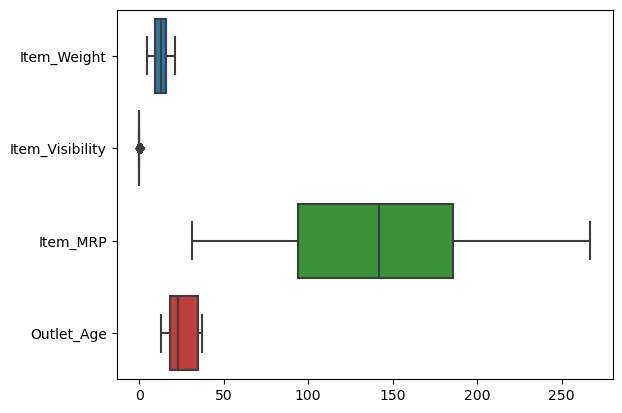

In [53]:
sns.boxplot(numcols,orient="h")

In [54]:
numcols['Item_Outlet_Sales']=objcols.Item_Outlet_Sales

In [55]:
objcols=objcols.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [56]:
objcols_dummy=pd.get_dummies(objcols)

In [57]:
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [58]:
salestrain_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales!='test']
salestest_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales=='test']

In [59]:
salestest_df=salestest_df.drop('Item_Outlet_Sales',axis=1)

In [60]:
y=salestrain_df.Item_Outlet_Sales
X=salestrain_df.drop('Item_Outlet_Sales',axis=1)

In [61]:
y=y.astype('float64')

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
reg=LinearRegression()

In [64]:
regmodel=reg.fit(X,y)

In [65]:
regmodel.score(X,y)

0.5637737001510252

In [66]:
regtestpredict = regmodel.predict(salestest_df)

In [67]:
regtestpredict = regmodel.predict(salestest_df)

In [68]:
# Replace negative predictions with zero
regtestpredict = np.where(regtestpredict < 0, 0, regtestpredict)

In [69]:
reg_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': regtestpredict
})

In [70]:
reg_output.to_csv("reg_output.csv", index=False)

In [71]:
from sklearn.metrics import r2_score

In [72]:
# For Linear Regression Model
reg_pred = regmodel.predict(X)
r2_linear = r2_score(y, reg_pred)
print("R-squared score for Linear Regression:", r2_linear)

R-squared score for Linear Regression: 0.5637737001510252


In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
tree=DecisionTreeRegressor(max_depth=8)

In [75]:
treemodel=tree.fit(X,y)

In [76]:
treemodel.score(X,y)

0.6358506446270598

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(tree,X,y)

array([0.5740877 , 0.55435008, 0.54234388, 0.56956931, 0.58864938])

In [79]:
treetestpred=treemodel.predict(salestest_df)

In [80]:
treetestpred = treemodel.predict(salestest_df)

In [81]:
treetestpred = np.where(treetestpred < 0, 0, treetestpred)

In [82]:
tree_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': treetestpred
})

In [83]:
tree_output.to_csv("tree_output.csv", index=False)

In [84]:
pd.DataFrame(treetestpred).to_csv("tree.csv")

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
RF=RandomForestRegressor(n_estimators=5000,max_depth=8)

In [87]:
RFmodel=RF.fit(X,y)

In [88]:
RFmodel.score(X,y)

0.6559014595857467

In [89]:
RFtestpredict=RFmodel.predict(salestest_df)

In [90]:
RFtestpredict = RFmodel.predict(salestest_df)

In [91]:
# Replace negative predictions with zero
RFtestpredict = np.where(RFtestpredict < 0, 0, RFtestpredict)

In [92]:
RF_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': RFtestpredict
})

In [93]:
RF_output.to_csv("RF_output.csv", index=False)

In [94]:
RF_pred = RFmodel.predict(X)
r2_RF = r2_score(y, RF_pred)
print("R-squared score for Random Forest Regressor:", r2_RF)

R-squared score for Random Forest Regressor: 0.6559014595857467


In [95]:
tree_pred = treemodel.predict(X)
r2_tree = r2_score(y, tree_pred)
print("R-squared score for Decision Tree Regressor:", r2_tree)

R-squared score for Decision Tree Regressor: 0.6358506446270598


In [96]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')  
svr.fit(X, y)
predictions = svr.predict(salestest_df)


In [97]:
svr_predictions = np.where(predictions < 0, 0, predictions)

In [98]:
svr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': svr_predictions
})

In [99]:
svr_output.to_csv("svr_output.csv", index=False)

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X, y)
knn_predictions = knn.predict(salestest_df)


In [101]:
knn_predictions = np.where(predictions < 0, 0, knn_predictions)

In [102]:
knn_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': knn_predictions
})

In [103]:
knn_output.to_csv("knn_output.csv", index=False)

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X, y)
gbr_predictions = gbr.predict(salestest_df)


In [105]:
gbr_predictions = np.where(gbr_predictions < 0, 0, gbr_predictions)

In [106]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': gbr_predictions
})

In [107]:
gbr_output.to_csv("gbr_output.csv", index=False)

In [108]:
import xgboost as xgb

In [109]:
XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
XGB.fit(X, y)
XGB_predictions = XGB.predict(salestest_df)

In [110]:
XGB_predictions = np.where(XGB_predictions < 0, 0, XGB_predictions)

In [111]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': XGB_predictions
})

In [112]:
gbr_output.to_csv("XGB_predictions.csv", index=False)

In [113]:
import lightgbm as lgb

In [114]:
LGB = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
LGB.fit(X, y)
LGB_predictions = LGB.predict(salestest_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 46
[LightGBM] [Info] Start training from score 2181.288915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [115]:
LGB_predictions = np.where(LGB_predictions < 0, 0, LGB_predictions)

In [117]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': LGB_predictions
})

In [118]:
gbr_output.to_csv("LGB_predictions.csv", index=False)

In [119]:
from catboost import CatBoostRegressor

CatBoost = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, loss_function='RMSE')
CatBoost.fit(X, y)
CatBoost_predictions = CatBoost.predict(salestest_df)


0:	learn: 1623.0323663	total: 155ms	remaining: 15.3s
1:	learn: 1552.3963520	total: 156ms	remaining: 7.65s
2:	learn: 1491.0717772	total: 157ms	remaining: 5.09s
3:	learn: 1437.8557161	total: 159ms	remaining: 3.81s
4:	learn: 1391.4350251	total: 160ms	remaining: 3.04s
5:	learn: 1352.5442097	total: 162ms	remaining: 2.53s
6:	learn: 1315.0319306	total: 163ms	remaining: 2.17s
7:	learn: 1285.3407799	total: 165ms	remaining: 1.9s
8:	learn: 1260.0482402	total: 166ms	remaining: 1.68s
9:	learn: 1237.7555740	total: 168ms	remaining: 1.51s
10:	learn: 1217.4521572	total: 170ms	remaining: 1.37s
11:	learn: 1197.9398441	total: 171ms	remaining: 1.25s
12:	learn: 1180.6532545	total: 172ms	remaining: 1.15s
13:	learn: 1167.7049822	total: 174ms	remaining: 1.07s
14:	learn: 1156.0734996	total: 175ms	remaining: 992ms
15:	learn: 1145.6509238	total: 177ms	remaining: 927ms
16:	learn: 1137.0810906	total: 178ms	remaining: 870ms
17:	learn: 1129.8187362	total: 180ms	remaining: 819ms
18:	learn: 1123.0373498	total: 181ms	re

In [120]:
CatBoost_predictions = np.where(CatBoost_predictions < 0, 0, CatBoost_predictions)

In [121]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': CatBoost_predictions
})

In [122]:
gbr_output.to_csv("CatBoost_predictions.csv", index=False)